In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [49]:
df_knn = pd.read_csv("df_cbn_tfidf.csv")

In [50]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBN
0,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.137931
1,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.137931
2,1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.137931
3,1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.137931
4,1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42972,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.103448
74996,42973,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.103448
74997,42974,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.103448
74998,42974,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.103448


Splitting dependent and independent variables

In [51]:
X = df_knn.drop(['X..CBN', 'index'], axis = 1)
y = df_knn[['X..CBN']]

Plotting histograms on target variable

In [52]:
y_array = y.to_numpy()
y_array

array([[0.13793103],
       [0.13793103],
       [0.13793103],
       ...,
       [0.10344828],
       [0.10344828],
       [0.10344828]])

<AxesSubplot:ylabel='Count'>

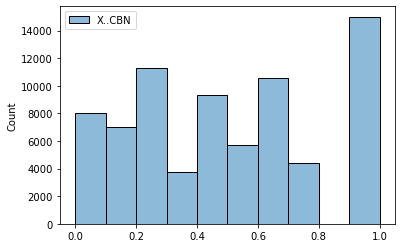

In [53]:
sns.histplot(y, bins = 10)

Train test split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [55]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [56]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [57]:
mean_absolute_error(y_val, y_pred_knreg)

0.07125411039280005

In [60]:
mean_squared_error(y_val, y_pred_knreg)

0.01918440684688347

In [61]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.13850778623197857

In [62]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8843124144404285

In [63]:
#val
r2_score(y_val, y_pred_knreg)

0.8055953844476413

Feature Selection

In [64]:
rfreg = RandomForestRegressor()

In [65]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [66]:
selector.estimator_.feature_importances_

array([3.04407509e-04, 9.50876268e-04, 3.46156460e-04, 2.54792690e-04,
       4.76753121e-04, 2.90654430e-03, 1.82772714e-03, 1.74601543e-03,
       6.72970287e-05, 5.82568183e-04, 2.94003106e-04, 2.23763091e-03,
       1.71381261e-04, 1.92422346e-04, 1.24246062e-03, 1.33295587e-04,
       1.11876815e-03, 4.21354791e-04, 2.05416300e-04, 6.11196543e-04,
       9.64230682e-04, 2.73456761e-03, 6.60559143e-04, 3.66164914e-04,
       5.58465406e-04, 3.77489439e-04, 1.19385924e-03, 3.94144578e-04,
       8.03019675e-04, 8.25672023e-04, 4.00461291e-03, 1.03826249e-03,
       1.68623459e-03, 3.68164192e-03, 1.22240253e-03, 9.33710075e-05,
       1.03523548e-04, 1.97316136e-03, 1.40133701e-04, 7.16534874e-04,
       4.95426346e-04, 1.13212635e-03, 6.36324231e-05, 4.10043177e-03,
       1.72623295e-04, 3.86954884e-04, 7.96355505e-04, 6.15082669e-04,
       8.00119526e-04, 7.83442167e-04, 3.90106437e-04, 2.30181273e-04,
       2.73853654e-03, 2.39176067e-04, 2.33379269e-03, 2.31740625e-04,
      

In [67]:
selector.threshold_

0.0021321961620469083

In [68]:
mask = selector.get_support()

In [69]:
mask

array([False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False,

In [70]:
selected_features = X.columns[mask]

In [71]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_5,tfidf_11,tfidf_21,tfidf_30,tfidf_33,tfidf_43,tfidf_52,tfidf_54,tfidf_65,tfidf_66,...,blueberry,cheese,citrus,diesel,lemon,mint,orange,pungent,sweet,vanilla
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206994,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206994,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.638774,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [72]:
selected_X.columns.to_list()

['tfidf_5',
 'tfidf_11',
 'tfidf_21',
 'tfidf_30',
 'tfidf_33',
 'tfidf_43',
 'tfidf_52',
 'tfidf_54',
 'tfidf_65',
 'tfidf_66',
 'tfidf_72',
 'tfidf_78',
 'tfidf_80',
 'tfidf_81',
 'tfidf_87',
 'tfidf_93',
 'tfidf_95',
 'tfidf_101',
 'tfidf_103',
 'tfidf_117',
 'tfidf_119',
 'tfidf_120',
 'tfidf_121',
 'tfidf_129',
 'tfidf_135',
 'tfidf_138',
 'tfidf_141',
 'tfidf_145',
 'tfidf_149',
 'tfidf_168',
 'tfidf_170',
 'tfidf_173',
 'tfidf_190',
 'tfidf_199',
 'tfidf_202',
 'tfidf_203',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_222',
 'tfidf_223',
 'tfidf_231',
 'tfidf_232',
 'tfidf_239',
 'tfidf_245',
 'tfidf_251',
 'tfidf_253',
 'tfidf_283',
 'tfidf_285',
 'tfidf_291',
 'tfidf_294',
 'tfidf_299',
 'tfidf_301',
 'tfidf_303',
 'tfidf_309',
 'tfidf_312',
 'tfidf_315',
 'tfidf_316',
 'tfidf_329',
 'tfidf_330',
 'tfidf_337',
 'tfidf_338',
 'tfidf_340',
 'tfidf_345',
 'tfidf_349',
 'tfidf_350',
 'tfidf_357',
 'tfidf_360',
 'tfidf_362',
 'hybrid',
 'indica',
 'sativa',
 'creative',
 'dry 

In [73]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_cbn.pkl")
joblib.dump(selector, "selector_knn_tfidf_cbn.pkl")

['selector_knn_tfidf_cbn.pkl']

Train test split (after Feature Selection)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [75]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [76]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [77]:
mean_absolute_error(y_val, y_pred_knreg)

0.06812674960575824

In [78]:
mean_squared_error(y_val, y_pred_knreg)

0.017504601717245473

In [79]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.13230495726633024

In [80]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8941679070271294

In [81]:
#val
r2_score(y_val, y_pred_knreg)

0.8213693360908196

Hyperparameter Tuning

In [82]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [83]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [84]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [85]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [86]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [87]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.036896691424146734

In [88]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.0112601493678068

In [89]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.1061138509705816

In [90]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.983896283665953

In [91]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8850926179425017

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [92]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [102]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_cbn.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_cbn.pkl")

['y_test_knreg_tfidf_cbn.pkl']

In [93]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03438216028339328

In [94]:
r2_score(y_test, y_pred_knreg_test)

0.8927203837707525

In [95]:
mean_squared_error(y_test, y_pred_knreg_test)

0.01058693950495487

In [96]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.10289285448929322

In [97]:
y_test

,X..CBN
11591,0.931034
52020,0.413793
34666,0.310345
22169,0.517241
23049,0.517241
...,...
60863,0.758621
32316,0.190805
60933,0.758621
43206,0.436782


In [98]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

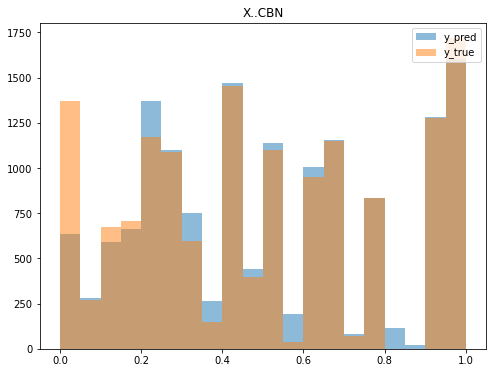

<Figure size 432x288 with 0 Axes>

In [99]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBN"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_cbn.png')

Pearson R

In [103]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.947
P-value: 0.000


<AxesSubplot:>

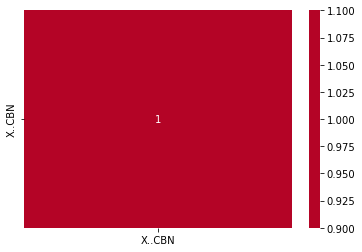

In [104]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)